In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/ubuntu/Notebooks/annsa/")


import annsa as an
import numpy as np

## Load template spectra

In [2]:
parent_folder       = "unshielded_low_dead_time/"
spectrum_identifier = "_1uC_spectrum.spe"
spectrumID_to_template_default = an.load_template_spectra_from_folder(parent_folder,spectrum_identifier)

## Generate spectra

In [3]:
def generate_source_key(number_of_sources,count_min,count_max,output_individual_background = False):
    
    # Background estimated to be ~65 cps
    # Estimating total detector CPS ranges from 65 -> number_of_sources*65 
    # time 10 seconds to 1hr (3600 seconds)
    # total_spectral_counts = np.floor(10**np.random.uniform(np.log10(65*10),np.log10(number_of_sources*65*1000)))

    total_spectral_counts = np.floor(10**np.random.uniform(np.log10(count_min),np.log10(number_of_sources*count_max)))

    source_simplex = an.create_simplex(1,number_of_sources)[0]
    
    shuffled_simplex = an.shuffle_simplex(source_simplex)
    
    if output_individual_background == True:

        shuffled_simplex = np.append(shuffled_simplex,an.create_simplex(1,3)*shuffled_simplex[-1])
        shuffled_simplex = np.delete(shuffled_simplex, -4)
    
    return np.floor(shuffled_simplex*total_spectral_counts)

In [4]:
number_of_samples = 5
number_of_isotopes_per_spectrum = 1

dataset_key = []
dataset_spectra = []


for i in range(number_of_samples):
    
    # Generate a key
    temp_key = generate_source_key(number_of_isotopes_per_spectrum+1,65*10,65*1000,True)
    
    temp_key = [int(k) for k in temp_key]
    
    # Decide on gain setting 
    gain_setting = np.random.uniform(0.952,1.428)
    
    # Generate a spectrum
    temp_spectrum = an.generate_spectrum_from_key(temp_key,spectrumID_to_template_default,gain_setting)
    
    
    dataset_key.append(temp_key)
    dataset_spectra.append(temp_spectrum)
    
    print '\1b[2k\r',    
    print('Epoch %s of %s' %(i ,number_of_samples)),
    


Epoch 3 of 5

/home/ubuntu/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Epoch 4 of 5


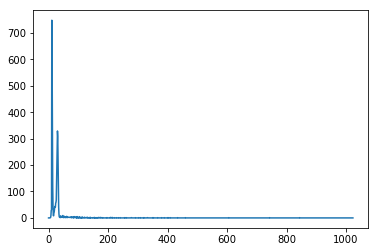

In [9]:
plt.plot(dataset_spectra[1])